# <a name="abstract">Titanic Machine Learning From Disaster</a>

**Abstract** The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1]:
using DataFrames
using Gadfly
using GLM, DecisionTree
using MLBase
using Iterators
importall Gadfly

  likely near /Users/diego/.julia/v0.4/MLBase/src/modeltune.jl:5
  likely near /Users/diego/.julia/v0.4/MLBase/src/modeltune.jl:5
  likely near /Users/diego/.julia/v0.4/MLBase/src/modeltune.jl:5
  likely near /Users/diego/.julia/v0.4/MLBase/src/deprecated/datapre.jl:104
  likely near /Users/diego/.julia/v0.4/MLBase/src/deprecated/datapre.jl:105
  likely near /Users/diego/.julia/v0.4/MLBase/src/deprecated/datapre.jl:163
  likely near /Users/diego/.julia/v0.4/MLBase/src/deprecated/datapre.jl:163
  likely near /Users/diego/.julia/v0.4/MLBase/src/deprecated/datapre.jl:163


In [2]:
quick_menu = """
<div style="float:right; position:fixed; top:120px; left:85%; background-color:#f0e7e7; opacity:.75;
            padding:2px; color:#3b5998;">
        <b>Quick Menu</b>
        <ul>
            <li><a href="#abstract">Intro</a></li>
            <li><a href="#load_data">Load Data</a></li>
            <li><a href="#var_class">Var Class</a></li>
            <li><a href="#univar_analysis">Univariate A.</a></li>
            <li><a href="#multivar_analysis">Multivariate A.</a></li>
            <li><a href="#reg_analysis">Regression A.</a></li>
        <ul>
    </div>
"""
HTML(quick_menu)

function add_button_show_inputs()
    HTML("""
    <style>
        div.output_stderr: { display:none !important; }
    </style>
    <script>
        code_show=true; 
        function code_toggle() {
             if(code_show){
                 \$('div.input').hide();
             } else {
                 \$('div.input').show();
             }
             code_show = !code_show
        } 
        \$( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()">
    <input style="float:right;" type="submit" value="Hide on/off the raw code">
    </form>""")
end

add_button_show_inputs()

HTML{ASCIIString}("<style>\n    div.output_stderr: { display:none !important; }\n</style>\n<script>\n    code_show=true; \n    function code_toggle() {\n         if(code_show){\n             \$('div.input').hide();\n         } else {\n             \$('div.input').show();\n         }\n         code_show = !code_show\n    } \n    \$( document ).ready(code_toggle);\n</script>\n<form action=\"javascript:code_toggle()\">\n<input style=\"float:right;\" type=\"submit\" value=\"Hide on/off the raw code\">\n</form>")

# <a name="load_data">Load Data</a>

In [3]:
train = readtable("data/train.csv")
test = readtable("data/test.csv");

# Exploratory Data Analysis

## Data Description

Data Size:

In [4]:
size(train)

(891,12)

Columns names, types and missing data:

In [5]:
showcols(train)

891x12 DataFrames.DataFrame
| Col # | Name        | Eltype     | Missing |
|-------|-------------|------------|---------|
| 1     | PassengerId | Int64      | 0       |
| 2     | Survived    | Int64      | 0       |
| 3     | Pclass      | Int64      | 0       |
| 4     | Name        | UTF8String | 0       |
| 5     | Sex         | UTF8String | 0       |
| 6     | Age         | Float64    | 177     |
| 7     | SibSp       | Int64      | 0       |
| 8     | Parch       | Int64      | 0       |
| 9     | Ticket      | UTF8String | 0       |
| 10    | Fare        | Float64    | 0       |
| 11    | Cabin       | UTF8String | 687     |
| 12    | Embarked    | UTF8String | 2       |

Show first lines:

In [6]:
head(train)

6x12 DataFrames.DataFrame
| Row | PassengerId | Survived | Pclass |
|-----|-------------|----------|--------|
| 1   | 1           | 0        | 3      |
| 2   | 2           | 1        | 1      |
| 3   | 3           | 1        | 3      |
| 4   | 4           | 1        | 1      |
| 5   | 5           | 0        | 3      |
| 6   | 6           | 0        | 3      |

| Row | Name                                                  | Sex      |
|-----|-------------------------------------------------------|----------|
| 1   | "Braund, Mr. Owen Harris"                             | "male"   |
| 2   | "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" | "female" |
| 3   | "Heikkinen, Miss. Laina"                              | "female" |
| 4   | "Futrelle, Mrs. Jacques Heath (Lily May Peel)"        | "female" |
| 5   | "Allen, Mr. William Henry"                            | "male"   |
| 6   | "Moran, Mr. James"                                    | "male"   |

| Row | Age  | SibSp | Parch | Ticket             | Fare    | Cabin  |
|-----|------|-------|-------|--------------------|---------|--------|
| 1   | 22.0 | 1     | 0     | "A/5 21171"        | 7.25    | NA     |
| 2   | 38.0 | 1     | 0     | "PC 17599"         | 71.2833 | "C85"  |
| 3   | 26.0 | 0     | 0     | "STON/O2. 3101282" | 7.925   | NA     |
| 4   | 35.0 | 1     | 0     | "113803"           | 53.1    | "C123" |
| 5   | 35.0 | 0     | 0     | "373450"           | 8.05    | NA     |
| 6   | NA   | 0     | 0     | "330877"           | 8.4583  | NA     |

| Row | Embarked |
|-----|----------|
| 1   | "S"      |
| 2   | "C"      |
| 3   | "S"      |
| 4   | "S"      |
| 5   | "S"      |
| 6   | "Q"      |

### Preprocessing

In [7]:
function feature_extraction1!(dataframe)
    dataframe[:CabinInitial] = map(c -> isna(c)? 'X' : c[1], dataframe[:, :Cabin]);
    dataframe[:SibSpBin] = map(c -> isna(c)? -1 : c > 0? 1 : 0, dataframe[:, :SibSp])
    dataframe[:ParchBin] = map(c -> isna(c)? -1 : c > 0? 1 : 0, dataframe[:, :Parch])
end
feature_extraction1!(train)
feature_extraction1!(test);

## <a href="#var_class">Variable Classification</a>

To conduct proper data analysis a good strategy is to segregate the variables by it's type and subtype. Exists made forms of perform it. As a initial data exploration, we can adopt `Numerical`, `Categorical` and `Textual` data classification.

#### Numerical Variables

In [8]:
numerical_vars = [:Age, :Fare]

2-element Array{Symbol,1}:
 :Age 
 :Fare

#### Categorical Variables

In [9]:
categorical_vars = [:PassengerId, :Survived, :Pclass, :Sex, :SibSp, :Parch, :Cabin, :Embarked,
                    :CabinInitial, :SibSpBin, :ParchBin]

11-element Array{Symbol,1}:
 :PassengerId 
 :Survived    
 :Pclass      
 :Sex         
 :SibSp       
 :Parch       
 :Cabin       
 :Embarked    
 :CabinInitial
 :SibSpBin    
 :ParchBin    

In [10]:
selected_categorical_vars = [:Survived, :Pclass, :Sex, :SibSp, :Parch, :Embarked,
                             :CabinInitial, :SibSpBin, :ParchBin]

9-element Array{Symbol,1}:
 :Survived    
 :Pclass      
 :Sex         
 :SibSp       
 :Parch       
 :Embarked    
 :CabinInitial
 :SibSpBin    
 :ParchBin    

#### Textual Variables

In [11]:
textual_vars = [:Name, :Ticket]

2-element Array{Symbol,1}:
 :Name  
 :Ticket

## <a name="univar_analysis">Univariate Analysis</a>

### Unique Values

In [12]:
print_unique(df, column) = println(column, ": ", join(Set(dropna(df[:, column])), ", "))
for c in categorical_vars begin print_unique(train, c) end end

PassengerId: 306, 29, 74, 176, 285, 318, 873, 354, 610, 563, 880, 671, 721, 117, 284, 474, 188, 589, 685, 782, 621, 617, 353, 797, 430, 79, 71, 154, 184, 794, 845, 733, 107, 416, 682, 10, 294, 606, 642, 162, 881, 240, 261, 514, 5, 840, 15, 41, 461, 148, 776, 586, 66, 573, 512, 95, 236, 90, 111, 844, 14, 396, 256, 592, 655, 565, 620, 763, 549, 135, 125, 146, 130, 545, 660, 453, 110, 309, 99, 525, 366, 556, 128, 9, 348, 831, 736, 183, 522, 591, 860, 103, 345, 152, 742, 723, 843, 730, 732, 667, 795, 832, 846, 454, 191, 312, 663, 446, 751, 276, 659, 508, 602, 241, 370, 197, 593, 654, 624, 142, 848, 614, 718, 818, 372, 612, 433, 664, 677, 279, 700, 368, 609, 885, 890, 672, 94, 290, 650, 115, 607, 418, 373, 171, 455, 824, 750, 334, 641, 178, 426, 313, 503, 551, 493, 577, 113, 293, 859, 297, 507, 471, 707, 393, 497, 274, 28, 634, 97, 377, 584, 39, 58, 867, 8, 333, 739, 428, 254, 628, 185, 635, 20, 868, 774, 849, 266, 421, 451, 166, 397, 35, 816, 286, 145, 392, 554, 346, 86, 126, 587, 303, 82,

#### Preprocess data

In [13]:
train_cleaned = train[!isna(train[:Age]),:]
train_cleaned = train_cleaned[!isna(train_cleaned[:Embarked]),:]
sex_labels = labelmap(train_cleaned[:,:Sex])
embarked_labels = labelmap(train_cleaned[:,:Embarked])
cabin_labels = labelmap(train_cleaned[:,:CabinInitial])
train_cleaned[:Sex] = labelencode(sex_labels, train_cleaned[:, :Sex])
train_cleaned[:Embarked] = labelencode(embarked_labels, train_cleaned[:, :Embarked]);
train_cleaned[:CabinInitial] = labelencode(cabin_labels, train_cleaned[:, :CabinInitial]);

#### Fill Missing Values

In [14]:
function warmup_missing_dict(dataframe, fixed_columns)
    input = aggregate(dataframe, fixed_columns, mean)
    return { join(Array(input[i,1:(end-1)]), "_") => input[i,end]  for i=1:size(input, 1) }
end

function fill_missing_values!(dataframe, fixed_columns, column_missing, input)
    for i=1:size(dataframe, 1)
        key = join(Array(dataframe[i, fixed_columns]), "_")
        if isna(dataframe[i, column_missing])
            dataframe[i, column_missing] = haskey(input, key)? input[key] : mean(dropna(dataframe[:,column_missing]))
        end
    end
    return dataframe
end


Use "Dict{Any,Any}([a=>b for (a,b) in c])" instead.


fill_missing_values! (generic function with 1 method)

In [15]:
fixed_age_columns = [:Pclass, :Sex, :SibSp, :Parch, :Embarked]
fixed_embarked_columns = [:Pclass, :Sex, :SibSp, :Parch, :Age]
fixed_fare_columns = [:Pclass, :Sex, :SibSp, :Parch, :Age]
input_age = warmup_missing_dict(train_cleaned[:, vcat(fixed_age_columns, :Age)], fixed_age_columns)
input_embarked = warmup_missing_dict(train_cleaned[:, vcat(fixed_embarked_columns, :Embarked)], fixed_embarked_columns)
input_fare = warmup_missing_dict(train_cleaned[:, vcat(fixed_embarked_columns, :Fare)], fixed_embarked_columns)
fill_missing_values!(train_cleaned, fixed_age_columns, :Age, input_age)
fill_missing_values!(train_cleaned, fixed_embarked_columns, :Embarked, input_embarked);

### Multivariate Analysis

In [16]:
function var_plot(dataframe, colums, highlighted_column)
    plots = []
    for c in colums
        push!(plots, plot(dataframe, x=c, color=highlighted_column, 
              Stat.histogram, Scale.x_discrete, Geom.bar))
    end
    set_default_plot_size(1200px, 1000px)
    plots = reshape(plots, (3,3))
    return vstack(map(i -> hstack(plots[i,:]...), vcat(1:3))...)
end

var_plot (generic function with 1 method)

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map at abstractarray.jl:1279
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[113], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Users/diego/.julia/v0.4/Gadfly/

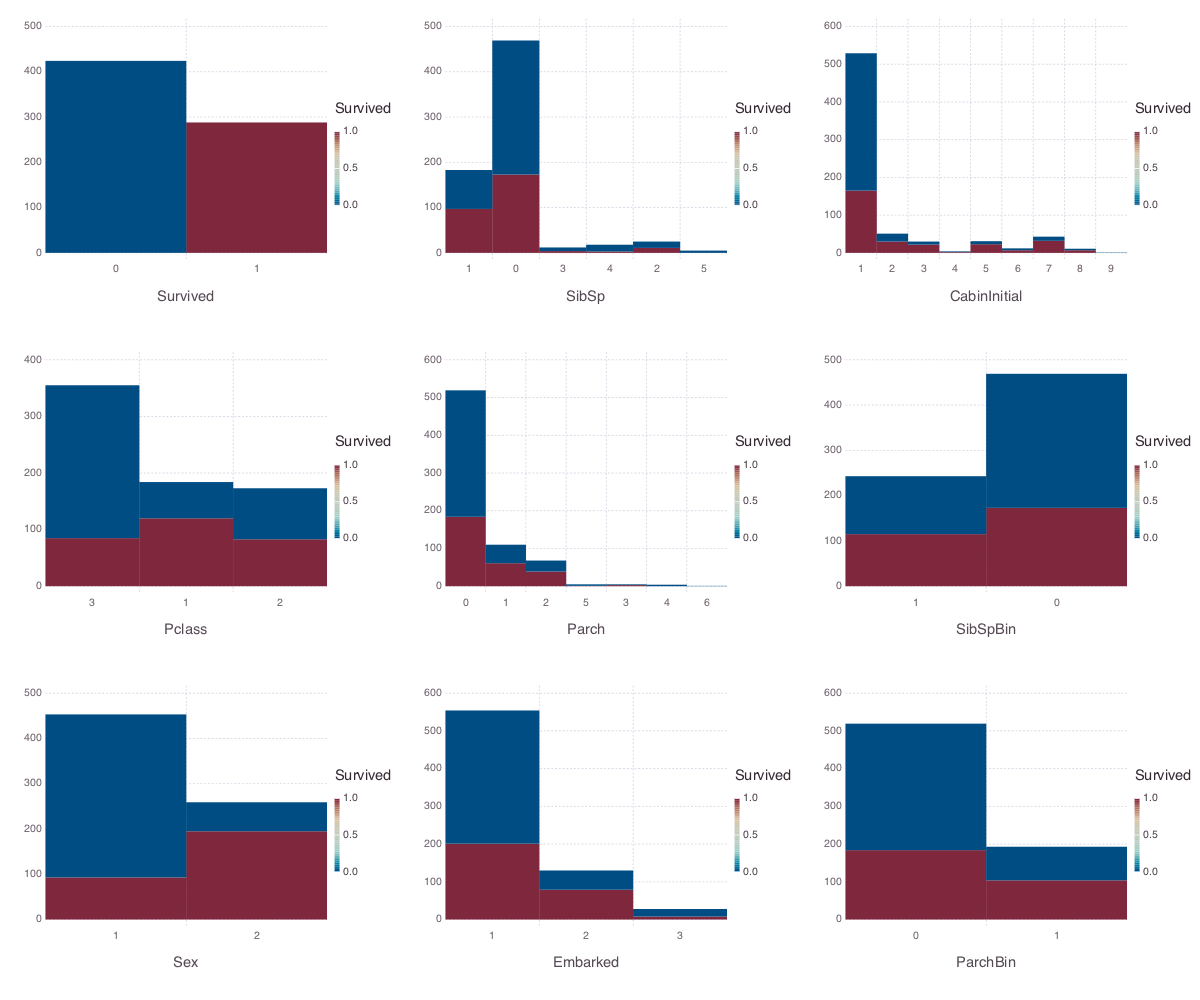

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53
 in apply_statistic at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:289
 in apply_statistics at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:38
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:734
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map_to! at abstractarray.jl:1260
 in map at abstractarray.jl:1282
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[113], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53

In [113]:
var_plot(train_cleaned, selected_categorical_vars, :Survived)

#### Selected where Cabin is Unknown

  likely near In[17]:1
  likely near In[17]:1
  likely near In[17]:1
in set_mapped_data! at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:275
  likely near In[17]:1
  likely near In[17]:1
  likely near In[17]:1
in __call#41__ at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
  likely near In[17]:1
in __call#41__ at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
  likely near In[17]:1
in __call#41__ at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map at abstractarray.jl:1279
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/di

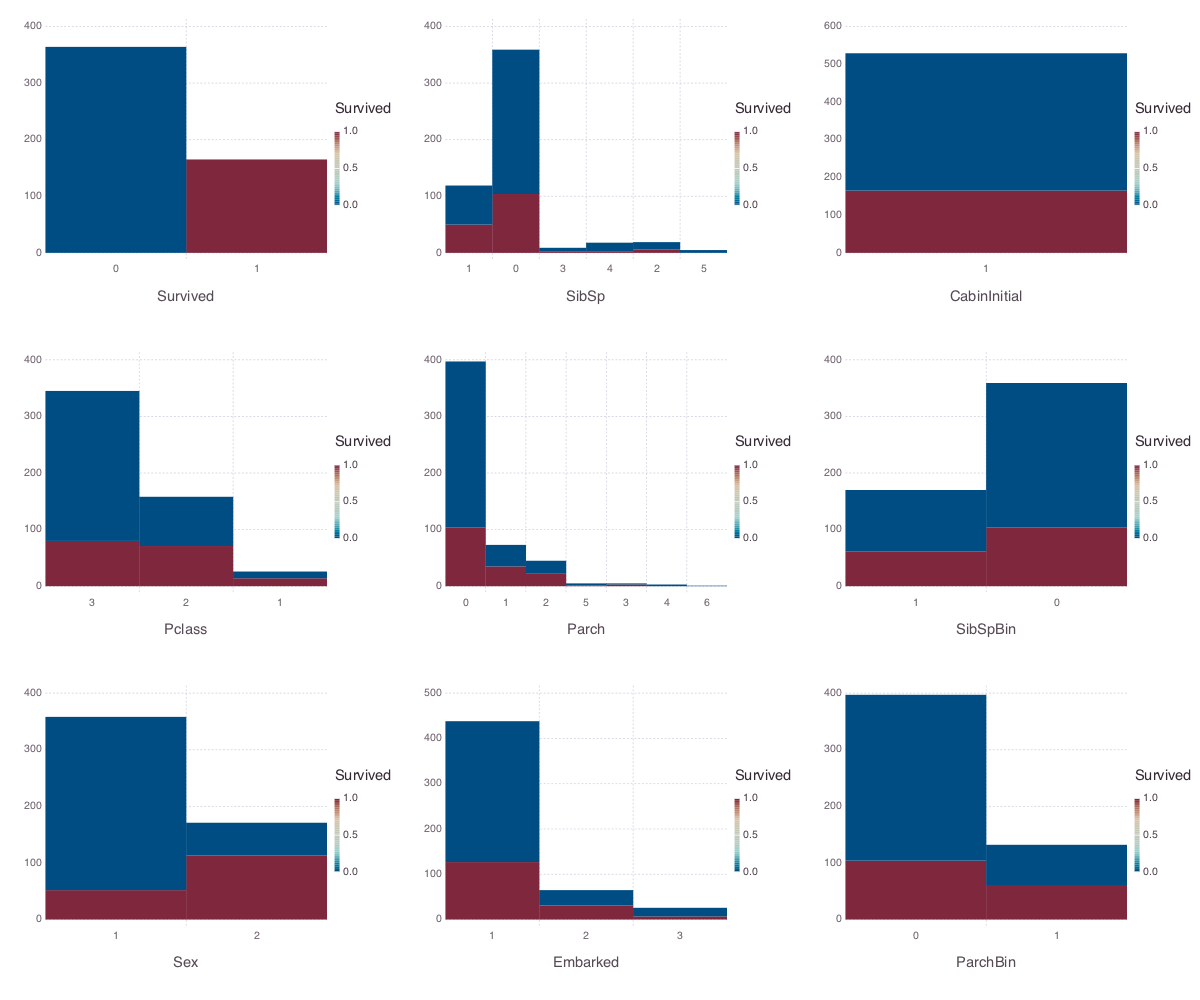

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53
 in apply_statistic at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:289
 in apply_statistics at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:38
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:734
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map_to! at abstractarray.jl:1260
 in map at abstractarray.jl:1282
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[17], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53


In [17]:
var_plot(train_cleaned[train_cleaned[:CabinInitial] .== 1, :], selected_categorical_vars, :Survived)

#### Select where Cabin is Know

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map at abstractarray.jl:1279
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[18], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Users/diego/.julia/v0.4/Gadfly/s

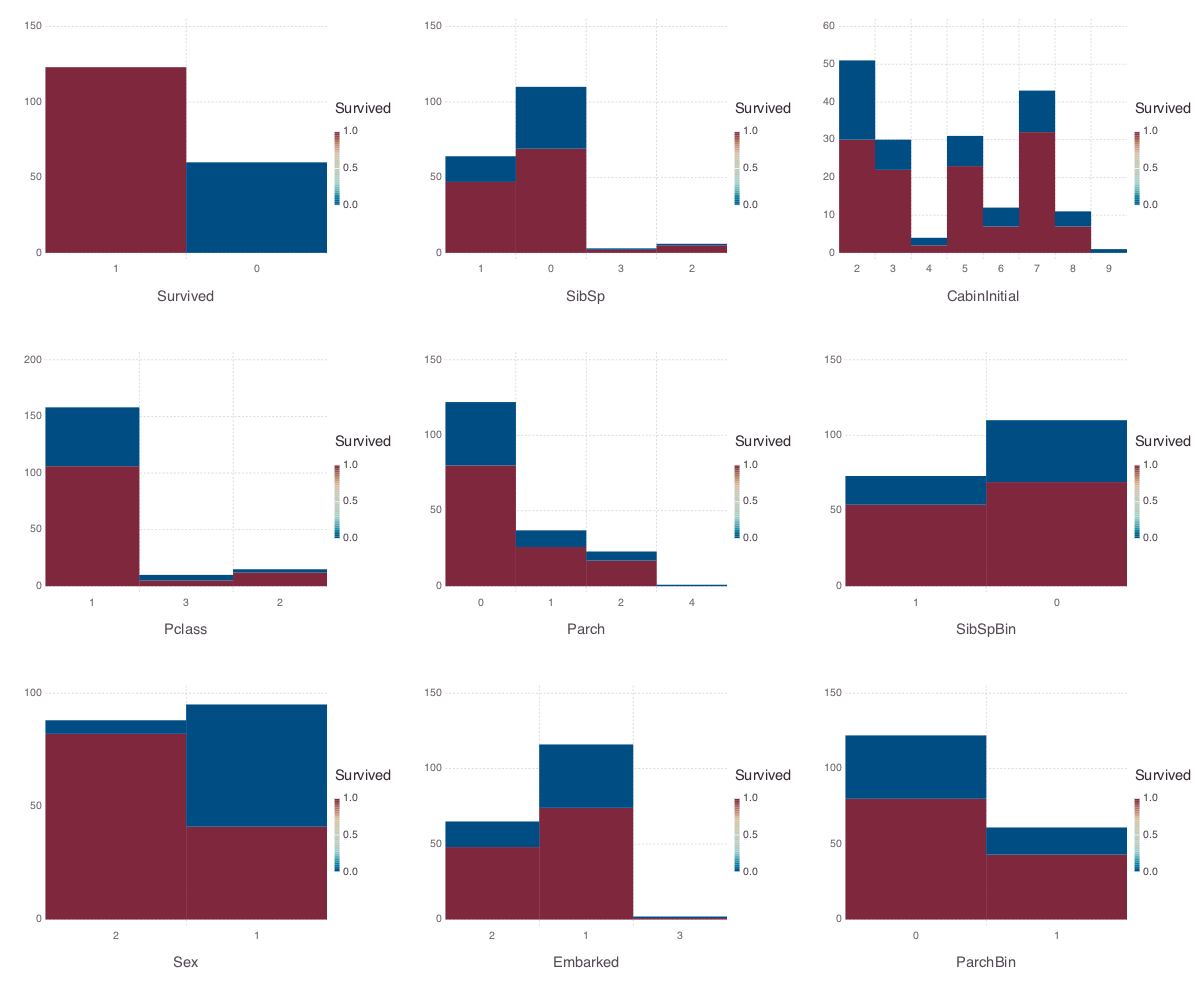

In [18]:
var_plot(train_cleaned[train_cleaned[:CabinInitial] .!= 1, :], selected_categorical_vars, :Survived)

#### Feature Selection

In [19]:
x_vars = [:Age, :Fare, :Pclass, :Sex, :SibSp, :CabinInitial, 
          :Parch, :SibSpBin, :ParchBin, :Embarked]
y_var = :Survived;

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53
 in apply_statistic at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:289
 in apply_statistics at /Users/diego/.julia/v0.4/Gadfly/src/statistics.jl:38
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:734
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in hstack at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:895
 in anonymous at In[16]:9
 in map_to! at abstractarray.jl:1260
 in map at abstractarray.jl:1282
 in var_plot at In[16]:9
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[18], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53


#### Model Generation

In [194]:
formulas = map(x -> parse(string(y_var, "~", join(x, "+"))), collect(subsets(x_vars)))[2:end]

# Training
generate_linear_models(df, formulas) = map(formula -> glm(eval(formula), df, Binomial()), formulas)
function generate_ensemble_linear_models(formulas)
    nrows = size(train_cleaned, 1)
    training_index = rand(vcat(1:nrows), int(nrows*.8))
    linear_models = generate_linear_models(train_cleaned[training_index,:], formulas)
    return linear_models
end

# Evaluation
binarize(y) = DataArray{Int8}(y .>= .5)
accuracy(y_real, y_pred) = round(sum(DataArray{Int8}(y_pred .== y_real))/length(y_real), 2)
accuracy(linear_model, x, y) = accuracy(y, binarize(predict(linear_model, x)))
accuracy(linear_models::Array, x, y) = map(m -> accuracy(m, x, y), linear_models)

# Show Best Models
function show_best_models(accs, formulas)
    best_acc = maximum(accs)
    best_models_index = findin(accs, best_acc)
    best_formulas = vcat(fill(formulas, 10)...)[best_models_index]
    println("Best Accuracy on training is: $best_acc")
    println("Best Models Index: $best_models_index")
    println("Best Models:\n$(join(best_formulas, "\n"))")
    return best_models_index
end

show_best_models (generic function with 1 method)

In [21]:
linear_models = vcat([generate_ensemble_linear_models(formulas) for i=1:10]...);

#### Simple Logistic Regression

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

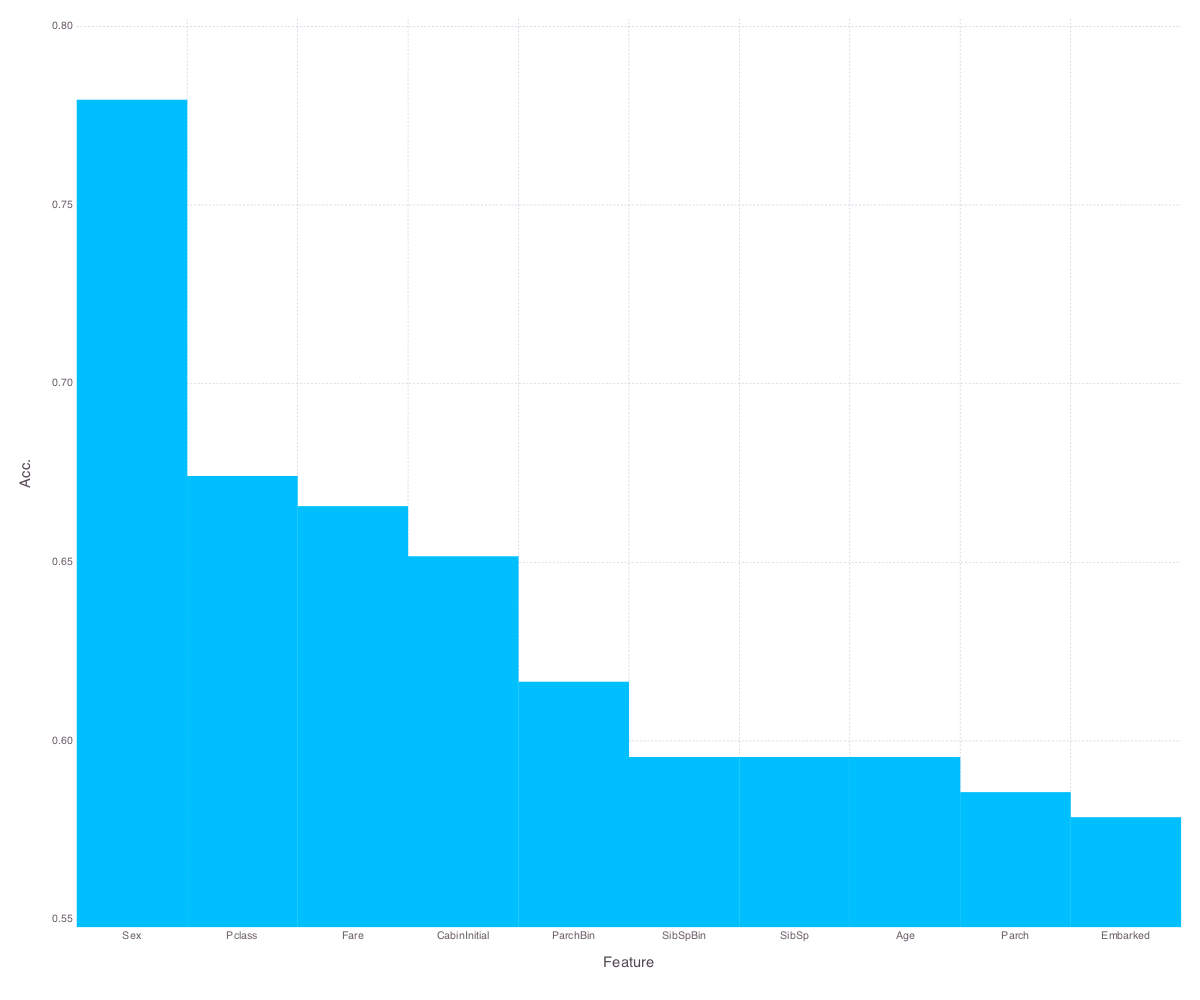

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:909
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:39
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

In [141]:
simple_formulas = map(v -> eval(parse(string(y_var, "~", v))), x_vars);
simple_linear_models = generate_linear_models(train_cleaned, simple_formulas);
predictions = map(lm -> binarize(predict(lm)), simple_linear_models)
accs = map(p -> sum(Array{Int8}(p .== train_cleaned[:Survived]))/length(p), predictions);
tlist = sort([(accs[i], x_vars[i], ) for i=1:length(accs)], rev=true)
plot(x=map(t->last(t), tlist), y=map(t->first(t), tlist), Scale.x_discrete, Geom.bar, Guide.xlabel("Feature"), Guide.ylabel("Acc."))

In [154]:
selected_x_vars = [:Sex, :Pclass, :Fare];

### Evaluate Ensemble Regression

  likely near In[22]:4
in set_mapped_data! at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:275
  likely near In[22]:4
  likely near In[22]:4
  likely near In[22]:4
in set_mapped_data! at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:275
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starti

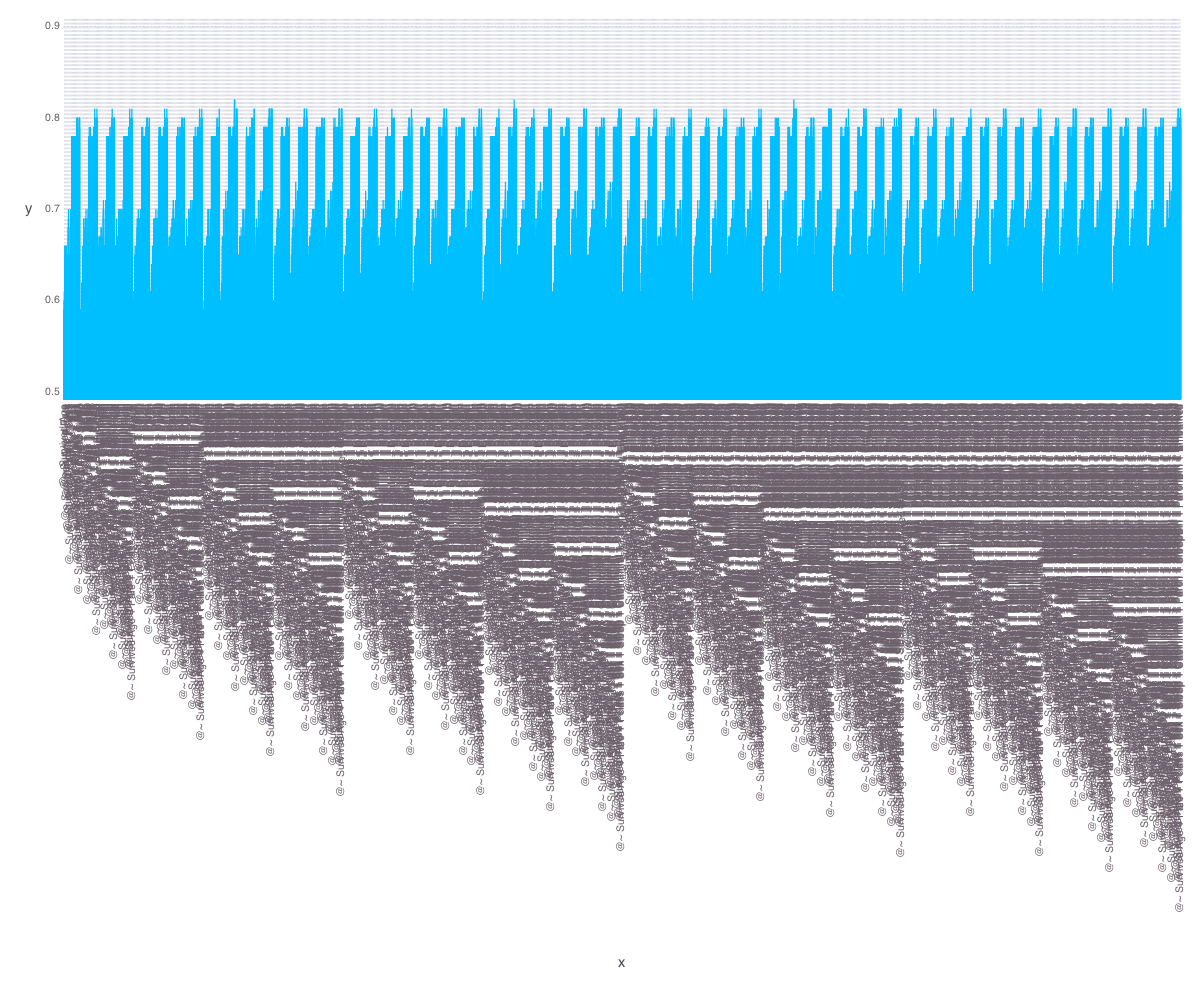

In [22]:
set_default_plot_size(1200px, 1000px)
training_p = int(size(train_cleaned, 1)* 0.7)
acc = accuracy(linear_models, train_cleaned[1:training_p, x_vars], train_cleaned[1:training_p, y_var])
plot(x=vcat(fill(formulas, 10)...), y=acc, Scale.x_discrete, Geom.bar)

In [23]:
show_best_models(acc, formulas);

Best Accuracy on training is: 0.82


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:909
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:39
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

### Ensemble Validation

In [24]:
function agreement_plot(ensemble_results)
    set_default_plot_size(1200px, 150px)
    x_size = size(ensemble_results,1)
    y_size = size(ensemble_results,2)
    plot(xintercept=map(i->sum(ensemble_results[i])/y_size > 0? i : 0, 1:x_size), Geom.vline)
end

function predict_ensamble(linear_models, x)
    ensemble_results = [binarize(predict(lm, x)) for lm in linear_models]
    ensemble_results = reshape(vcat(ensemble_results...), (length(ensemble_results[1]), size(ensemble_results,1)))
    return aggregate_predicted_ensemble_results(ensemble_results)
end

function select_ensemble_models(linear_models, acc, threshold_ensemble=.8)
    linear_models_x_acc = [(linear_models[i], acc[i]) for i=1:length(acc)]
    selected_models = filter(tuple -> last(tuple) .> threshold_ensemble, linear_models_x_acc)
    return vcat([first(tuple) for tuple in selected_models]...)
end

function predict_ensemble(linear_models)
    nensembles = length(linear_models)
    ensemble_results = [binarize(predict(lm, train_cleaned[1:training_p, x_vars])) for lm in linear_models]
    ensemble_results = reshape(vcat(ensemble_results...), (length(ensemble_results[1]), size(ensemble_results,1)))
    return ensemble_results
end

function aggregate_predicted_ensemble_results(ensemble_results)
    return [sum(ensemble_results[i,:])/size(ensemble_results,2) > .5? 1 : 0 for i=1:size(ensemble_results,1)]
end

ensemble_accuracy(y_real, y_pred) = round(sum(Array{Int8}(y_real - y_pred .== 0))/length(y_real), 2)

ensemble_accuracy (generic function with 1 method)

### Agreement Between Classifiers

Best Models Index: [1180,1692,7318,7574,8341]
Best Models:
@~ Survived Age + Pclass + Sex + SibSp + SibSpBin
@~ Survived Age + Pclass + Sex + SibSp + SibSpBin + Embarked
@~ Survived Age + Pclass + Sex + SibSp + SibSpBin
@~ Survived Age + Pclass + Sex + SibSp + SibSpBin + ParchBin
@~ Survived Age + Pclass + Sex + SibSp + SibSpBin


  likely near In[25]:3
in set_mapped_data! at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:275
  likely near In[25]:3
  likely near In[25]:3
  likely near In[25]:3
  likely near In[25]:3
  likely near In[25]:3
  likely near In[25]:3
  likely near In[25]:3
in __call#64__ at /Users/diego/.julia/v0.4/Gadfly/src/geom/vline.jl:10
  likely near In[25]:3
in __call#64__ at /Users/diego/.julia/v0.4/Gadfly/src/geom/vline.jl:10
  likely near In[25]:3
in __call#64__ at /Users/diego/.julia/v0.4/Gadfly/src/geom/vline.jl:10
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/geom/vline.jl:10
 in plot at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:361
 in plot at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:369
 in agreement_plot at In[24]:5
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in an

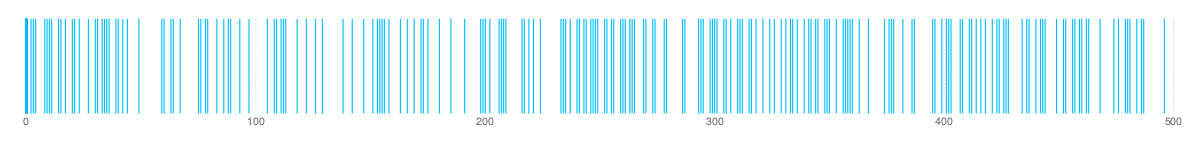

In [25]:
selected_ensemble_models = select_ensemble_models(linear_models, acc, .8)
ensemble_results = predict_ensemble(selected_ensemble_models);
agreement_plot(ensemble_results)

In [26]:
result = ensemble_accuracy(train_cleaned[1:training_p,:Survived], aggregate_predicted_ensemble_results(ensemble_results))
println("Acc: $result")

Acc: 0.81


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in draw at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:885
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:926
 in base64encode at base64.jl:160
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /

### Evaluate Segmented Logistic Regression For Training

In [202]:
function training_split_validation(dataframe, split_percentage, formulas)
    println("\nSplit: $split_percentage")
    training_split = int(size(dataframe, 1) * split_percentage)
    train_p1 = dataframe[1:training_split, :]
    train_p2 = dataframe[training_split+1:end, :]

    linear_models = generate_linear_models(train_p1, formulas)
    
    temp_x_vars = setdiff(names(dataframe), [y_var])
    
    accs_p1 = accuracy(linear_models, train_p1[:, temp_x_vars], train_p1[:, y_var])
    accs_p2 = accuracy(linear_models, train_p2[:, temp_x_vars], train_p2[:, y_var])
    best_models_index = show_best_models(accs_p2, formulas)
    
    return (maximum(accs_p1), maximum(accs_p2), best_models_index, linear_models)
end

training_split_validation (generic function with 2 methods)

In [149]:
results = [training_split_validation(train_cleaned, s, formulas) for s=vcat(.1:.1:.9)];

Split: 0.1
Best Accuracy on training is: 0.8
Best Models Index: [652]
Best Models:
@~ Survived Pclass + Sex + SibSpBin + Embarked
Split: 0.2
Best Accuracy on training is: 0.79
Best Models Index: [140,269,652,654,781]
Best Models:
@~ Survived Pclass + Sex + SibSpBin
@~ Survived Age + Pclass + Sex + ParchBin
@~ Survived Pclass + Sex + SibSpBin + Embarked
@~ Survived Fare + Pclass + Sex + SibSpBin + Embarked
@~ Survived Age + Pclass + Sex + ParchBin + Embarked
Split: 0.3
Best Accuracy on training is: 0.8
Best Models Index: [61,63,189,191,317,575,701,749,751,829]
Best Models:
@~ Survived Age + Pclass + Sex + SibSp + CabinInitial
@~ Survived Age + Fare + Pclass + Sex + SibSp + CabinInitial
@~ Survived Age + Pclass + Sex + SibSp + CabinInitial + SibSpBin
@~ Survived Age + Fare + Pclass + Sex + SibSp + CabinInitial + SibSpBin
@~ Survived Age + Pclass + Sex + SibSp + CabinInitial + ParchBin
@~ Survived Age + Fare + Pclass + Sex + SibSp + CabinInitial + Embarked
@~ Survived Age + Pclass + Sex +

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

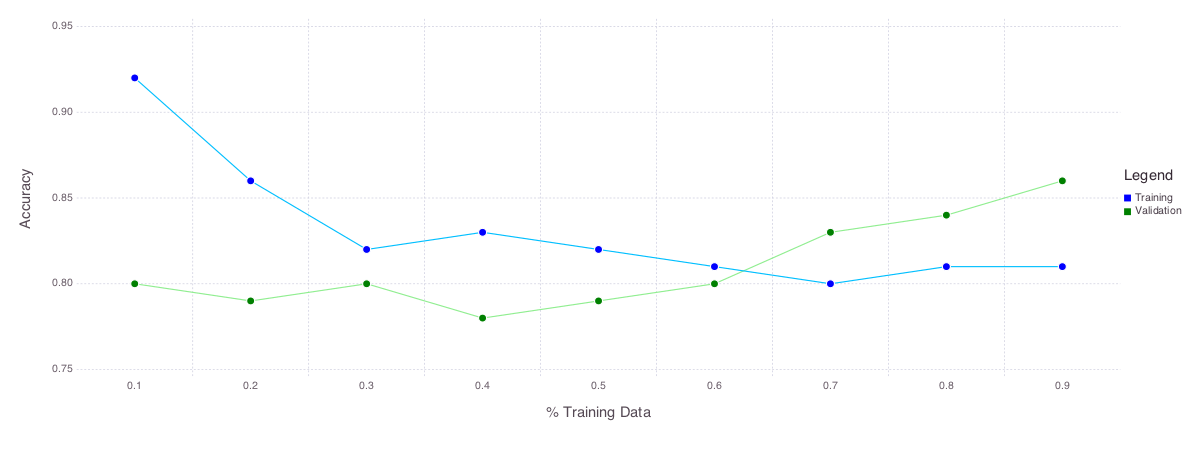

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:909
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:39
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

In [151]:
function training_validation_plot(results, scale)
    acc_training = [results[i][1] for i in 1:size(results,1)]
    acc_validation = [results[i][2] for i in 1:size(results,1)]
    set_default_plot_size(1200px, 450px)
    plot(
         layer(x=scale, y=acc_training, Theme(default_color=colorant"blue", default_point_size=4px), Geom.point),
         layer(x=scale, y=acc_validation, Theme(default_color=colorant"green", default_point_size=4px), Geom.point),
         layer(x=scale, y=acc_training, Geom.line),
         layer(x=scale, y=acc_validation, Geom.line, Theme(default_color=colorant"lightgreen")),
         Scale.x_discrete, 
         Guide.xlabel("% Training Data"),
         Guide.ylabel("Accuracy"),
         Guide.manual_color_key("Legend", ["Training", "Validation"], ["blue", "green"]))
end

training_validation_plot(results, vcat(.1:.1:.9))

### Clear Test

Let's make some preprocessing in test set and generate the results for submission at Kaggle. First we need to solve missing data. For this let see what data are missing and try to input with correct strategy.

In [101]:
test_cleaned = test[:, x_vars]
test_cleaned[:Sex] = labelencode(sex_labels, test_cleaned[:, :Sex])
test_cleaned[:Embarked] = labelencode(embarked_labels, test_cleaned[:, :Embarked])
test_cleaned[:CabinInitial] = labelencode(cabin_labels, test_cleaned[:, :CabinInitial])
showcols(test_cleaned)

418x10 DataFrames.DataFrame
| Col # | Name         | Eltype  | Missing |
|-------|--------------|---------|---------|
| 1     | Age          | Float64 | 86      |
| 2     | Fare         | Float64 | 1       |
| 3     | Pclass       | Int64   | 0       |
| 4     | Sex          | Int64   | 0       |
| 5     | SibSp        | Int64   | 0       |
| 6     | CabinInitial | Int64   | 0       |
| 7     | Parch        | Int64   | 0       |
| 8     | SibSpBin     | Any     | 0       |
| 9     | ParchBin     | Any     | 0       |
| 10    | Embarked     | Int64   | 0       |

In [102]:
fill_missing_values!(test_cleaned, fixed_age_columns, :Age, input_age)
fill_missing_values!(test_cleaned, fixed_embarked_columns, :Embarked, input_embarked)
fill_missing_values!(test_cleaned, fixed_fare_columns, :Fare, input_fare)
showcols(test_cleaned)

418x10 DataFrames.DataFrame
| Col # | Name         | Eltype  | Missing |
|-------|--------------|---------|---------|
| 1     | Age          | Float64 | 0       |
| 2     | Fare         | Float64 | 0       |
| 3     | Pclass       | Int64   | 0       |
| 4     | Sex          | Int64   | 0       |
| 5     | SibSp        | Int64   | 0       |
| 6     | CabinInitial | Int64   | 0       |
| 7     | Parch        | Int64   | 0       |
| 8     | SibSpBin     | Any     | 0       |
| 9     | ParchBin     | Any     | 0       |
| 10    | Embarked     | Int64   | 0       |

### Prediction Results: Multiple Logistic Regression

#### Split: .6

In [99]:
# Model with Spliting .6, #669: Age + Pclass + Sex + SibSp + SibSpBin + Embarked
selected_model = results[6][4][669];
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=binarize(predict(selected_model, test_cleaned)));

In [108]:
writetable("./data/prediction_v4_logistic_reg_model_input_improved_non_overfited_.6.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.76077**
</div>

#### Spit .9

In [110]:
# Model with Spliting .9, #479: Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin
selected_model = results[9][4][479];
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=binarize(predict(selected_model, test_cleaned)));

In [111]:
writetable("./data/prediction_v4_logistic_reg_model_input_improved_non_overfited_.9.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.75598**
</div>

### Gender Based Model

#### Training

In [120]:
acc = sum(Array{Int8}(Array{Int8}(train_cleaned[:, :Sex] .== 2) .== train_cleaned[:,:Survived]))/size(train_cleaned[:, :Survived], 1)

0.7794943820224719

#### Predict

In [115]:
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=Array{Int8}(test_cleaned[:, :Sex] .== 2));

In [116]:
writetable("./data/prediction_v4_gender_based_model.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.76555**
</div>

### Evaluate Selected Features Throught Simple Logistic Regression

In [155]:
selected_formulas = map(x -> parse(string(y_var, "~", join(x, "+"))), collect(subsets(selected_x_vars)))[2:end]
results = [training_split_validation(train_cleaned, s, selected_formulas) for s=vcat(.1:.1:.9)];

Split: 0.1
Best Accuracy on training is: 0.78
Best Models Index: [1,3,5]
Best Models:
@~ Survived Sex
@~ Survived Sex + Pclass
@~ Survived Sex + Fare
Split: 0.2
Best Accuracy on training is: 0.77
Best Models Index: [1,3,5,7]
Best Models:
@~ Survived Sex
@~ Survived Sex + Pclass
@~ Survived Sex + Fare
@~ Survived Sex + Pclass + Fare
Split: 0.3
Best Accuracy on training is: 0.78
Best Models Index: [5]
Best Models:
@~ Survived Sex + Fare
Split: 0.4
Best Accuracy on training is: 0.77
Best Models Index: [5]
Best Models:
@~ Survived Sex + Fare
Split: 0.5
Best Accuracy on training is: 0.77
Best Models Index: [5]
Best Models:
@~ Survived Sex + Fare
Split: 0.6
Best Accuracy on training is: 0.77
Best Models Index: [5]
Best Models:
@~ Survived Sex + Fare
Split: 0.7
Best Accuracy on training is: 0.79
Best Models Index: [5]
Best Models:
@~ Survived Sex + Fare
Split: 0.8
Best Accuracy on training is: 0.8
Best Models Index: [1,3,5,7]
Best Models:
@~ Survived Sex
@~ Survived Sex + Pclass
@~ Survived S

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

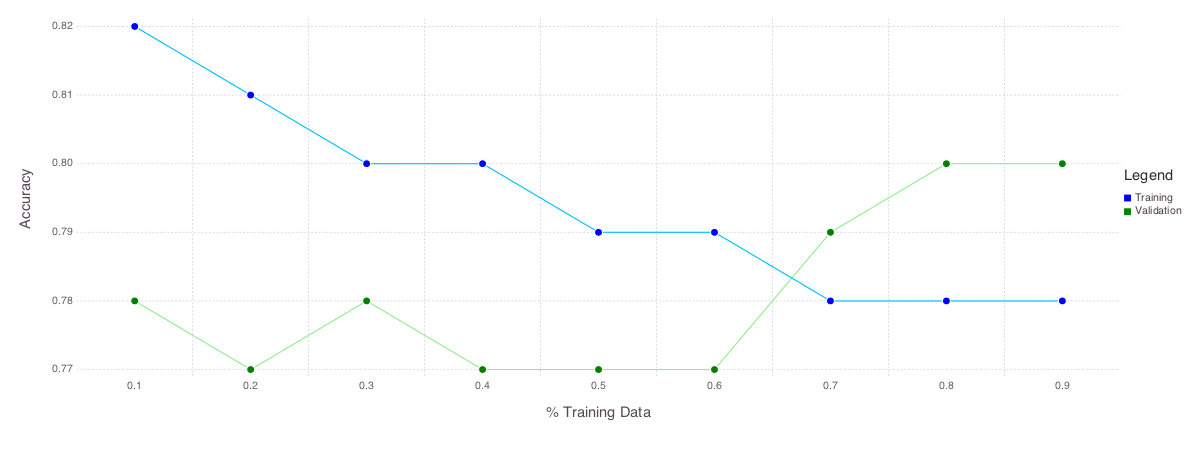

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:909
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:39
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

In [156]:
training_validation_plot(results, vcat(.1:.1:.9))

In [157]:
# Model with Spliting .7, #5: Age + Fare
selected_model = results[7][4][5];
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=binarize(predict(selected_model, test_cleaned)));

In [159]:
writetable("./data/prediction_v4_logistic_reg_model_age_fare_input_improved_non_overfited_.7.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.76077**
</div>

### Sex + Fare + Cabin Survival Model

In [160]:
results = [training_split_validation(train_cleaned, s, [Survived ~ Sex + Fare + CabinInitial]) for s=vcat(.1:.1:.9)];

Split: 0.1


Best Accuracy on training is: 0.78


 in depwarn at deprecated.jl:73
 in int at deprecated.jl:50
 in training_split_validation at In[54]:3
 in anonymous at no file
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[160], in expression starting on line 1


Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.2
Best Accuracy on training is: 0.77
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.3
Best Accuracy on training is: 0.78
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.4
Best Accuracy on training is: 0.77
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.5
Best Accuracy on training is: 0.78
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.6
Best Accuracy on training is: 0.76
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.7
Best Accuracy on training is: 0.78
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.8
Best Accuracy on training is: 0.8
Best Models Index: [1]
Best Models:
Formula: Survived ~ Sex + Fare + CabinInitial
Split: 0.9
Best Accurac

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

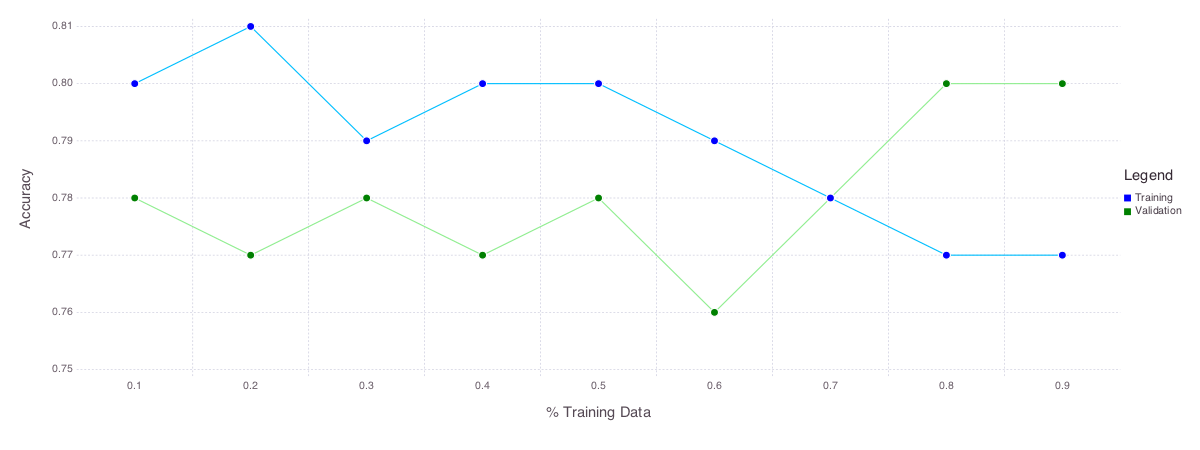

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/varset.jl:53
 in render at /Users/diego/.julia/v0.4/Gadfly/src/geom/point.jl:35
 in render at /Users/diego/.julia/v0.4/Gadfly/src/geometry.jl:47
 in render_prepared at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:846
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:785
 in draw at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:885
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:926
 in base64encode at base64.jl:160
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:32
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/dieg

In [161]:
training_validation_plot(results, vcat(.1:.1:.9))

In [ ]:
# Model with Spliting .7, #5: Age + Fare + CabinInitial
selected_model = results[7][4][1];
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=binarize(predict(selected_model, test_cleaned)));

In [207]:
writetable("./data/prediction_v4_logistic_reg_model_age_fare_cabininitial_input_improved_non_overfited_.7.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.76077**
</div>

### Adding New Features

In [198]:
function add_new_features!(df)
    df[:is_mother] = map(i -> 
        df[i,:Sex] == 2 && df[i,:Parch] > 0 && df[i,:Age] > 12? 1 : 0,
        vcat(1:size(df,1)))
    df[:is_child] = map(i -> df[i,:Age] < 18? 1 : 0, vcat(1:size(df,1)))
end
add_new_features!(train_cleaned)
add_new_features!(test_cleaned);

In [205]:
new_features = vcat(x_vars, :is_mother, :is_child)
selected_formulas = map(x -> parse(string(y_var, "~", join(x, "+"))), collect(subsets(new_features)))[2:end]
results = [training_split_validation(train_cleaned, s, selected_formulas) for s=vcat(.1:.1:.9)];


Split: 0.1
Best Accuracy on training is: 0.8
Best Models Index: [652,2204,2716]
Best Models:
@~ Survived Pclass + Sex + SibSpBin + Embarked
@~ Survived Pclass + Sex + SibSp + SibSpBin + is_child
@~ Survived Pclass + Sex + SibSp + SibSpBin + Embarked + is_child

Split: 0.2
Best Accuracy on training is: 0.79
Best Models Index: [140,269,652,654,781,2125,2204,2206,2238,2270,2396,2398,2654,2716,2718,2748,2750,2910]
Best Models:
@~ Survived Pclass + Sex + SibSpBin
@~ Survived Age + Pclass + Sex + ParchBin
@~ Survived Pclass + Sex + SibSpBin + Embarked
@~ Survived Fare + Pclass + Sex + SibSpBin + Embarked
@~ Survived Age + Pclass + Sex + ParchBin + Embarked
@~ Survived Age + Pclass + Sex + Parch + is_child
@~ Survived Pclass + Sex + SibSp + SibSpBin + is_child
@~ Survived Fare + Pclass + Sex + SibSp + SibSpBin + is_child
@~ Survived Fare + Pclass + Sex + SibSp + CabinInitial + SibSpBin + is_child
@~ Survived Fare + Pclass + Sex + SibSp + Parch + SibSpBin + is_child
@~ Survived Pclass + Sex +

Best Models Index: [479,735,991,1503,2015,2520,2521,3033,3544,3545]
Best Models:
@~ Survived Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin
@~ Survived Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + Embarked
@~ Survived Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin + Embarked
@~ Survived Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin + is_mother
@~ Survived Age + Fare + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin + Embarked + is_mother
@~ Survived Sex + SibSp + Parch + SibSpBin + ParchBin + is_child
@~ Survived Age + Sex + SibSp + Parch + SibSpBin + ParchBin + is_child
@~ Survived Age + Sex + SibSp + Parch + SibSpBin + ParchBin + Embarked + is_child
@~ Survived Sex + SibSp + Parch + SibSpBin + ParchBin + is_mother + is_child
@~ Survived Age + Sex + SibSp + Parch + SibSpBin + ParchBin + is_mother + is_child


 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:918
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:29
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

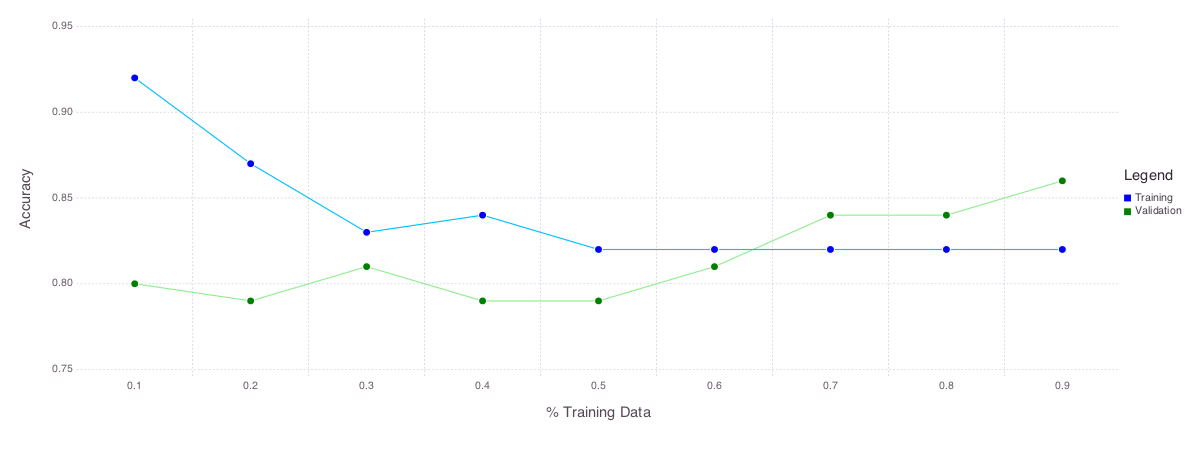

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:46
 in call at /Users/diego/.julia/v0.4/Gadfly/src/coord.jl:43
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:507
 in render at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:781
 in writemime at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:909
 in sprint at iostream.jl:206
 in display_dict at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:39
 in execute_request_0x535c5df2 at /Users/diego/.julia/v0.4/IJulia/src/execute_request.jl:212
 in eventloop at /Users/diego/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /Users/diego/.julia/v0.4/IJulia/src/kernel.jl, in expression starting on line 31
 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in default_statistic at /Users/diego/.julia/v0.4/Gadfly/src/guide.jl:557
 in render_prepare at /Users/diego/.julia/v0.4/Gadfly/src/Gadfly.jl:669
 in render at /Us

In [206]:
training_validation_plot(results, vcat(.1:.1:.9))

In [209]:
# Model with Spliting .7, #5: Age + Pclass + Sex + SibSp + Parch + SibSpBin + ParchBin + Embarked + is_mother
selected_model = results[7][4][2013];
prediction_dataframe = DataFrame(PassengerId=test[:PassengerId], 
                                 Survived=binarize(predict(selected_model, test_cleaned)));

In [210]:
writetable("./data/prediction_v4_logistic_reg_model_is_mother_input_improved_non_overfited_.7.csv", prediction_dataframe)

<div style="background-color:#c1f5ba; color:#30b171; padding:5px;
            font-family:'Lucida Sans Unicode', 'Lucida Grande', sans-serif">
    Results from this submission on Kaggle: **0.76077**
</div>

## Exporting Clean Data

In [ ]:
writetable("data/train_cleaned.csv", train_cleaned, separator='\t')
writetable("data/test_cleaned.csv", test_cleaned, separator='\t')

Please look for the **Board Notebook** to get the more updated version of improvement over this challenge.

## Conclusions

This was a second attempt to use machine learning algorithms in Julia inside a Kaggle Competition. We are far from the best result, but we will in the notebook v3 and beyond explore new techniques that can improve the results. Lets keep forward!

In [ ]:
HTML("""<script> 
    out = document.getElementsByClassName("output_stderr")
    for (i in out) { 
        out[i].style.display = "None";
    } </script>""");